# Welcome to Lab: GPA 🎓

In this lab, you'll explore the GPA dataset again to find out more about the courses here at UIUC!

Fun fact: the dataset you're using in this lab is the same dataset that Professor Wade uses to make the GPA visualizations! :)  Check this out here if you haven't seen it already: [https://waf.cs.illinois.edu/discovery/grade_disparity_between_sections_at_uiuc/](https://waf.cs.illinois.edu/discovery/grade_disparity_between_sections_at_uiuc/)


A few tips to remember:

- **You are not alone on your journey in learning programming!**  You have your lab TA, your CAs, your lab group, and the professors (Prof. Wade and Prof. Karle), who are all here to help you out!
- If you find yourself stuck for more than a few minutes, ask a neighbor or course staff for help!  When you are giving help to your neighbor, explain the **idea and approach** to the problem without sharing the answer itself so they can have the same **<i>ah-hah</i>** moment!
- We are here to help you!  Don't feel embarrassed or shy to ask us for help!

Let's get started!

In [ ]:
# Meet your CAs and TA if you haven't already!
# ...first name is enough, we'll know who they are! :)
ta_name = "Yu Bao"
ca1_name = ""
ca2_name = ""
ca3_name = ""


# Say hello to each other!
# - Groups of 3 are ideal :)
# - However, groups of 2 or 4 are fine too!
#
# Question of the Day (QOTD) to Ask Your Group: "What's your favorite social media?"
partner1_name = "Eric "
partner1_netid = "ericz27"
partner1_favsocialmedia = "YouTube"

partner2_name = "Yide"
partner2_netid = "yideguo2"
partner2_favsocialmedia = "WeChat"

partner3_name = ""
partner3_netid = ""
partner3_favsocialmedia= ""

# Which lab section are you in? Record it below! It should start with a Y and have 
# 2 numbers after the Y. If you're unsure - ask your TA/CAs!
lab_section = "Y17"

<hr style="color: #DD3403;">

# Part 1: Exploring GPA

## Load the GPA Dataset

Before we begin exploring the GPA Dataset, we've got to load it in! The most recent version of the "GPA Dataset" (up to Winter 2024) is available here:
```
https://waf.cs.illinois.edu/discovery/gpa.csv
```

Use Python to load this dataset into a DataFrame called `df`:

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://waf.cs.illinois.edu/discovery/gpa.csv")
df.columns

### 🔬 Test Case Checkpoint 🔬

In [ ]:
## == CHECKPOINT TEST CASES ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any errors, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
assert(len(df) == 69112), "This is not the GPA dataset you're looking for."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

### Puzzle 1.1: The "Average GPA" Column
Each row in the GPA Dataset represents a **course section** at Illinois. For our exploratory data analysis, we are going to need an additional `Average GPA` column.

To create this column, we need to compute the **weighted average GPA** for each course section by taking into account the **number of students** who received each letter grade and the weight of each letter grade (see page 27 of your notebook for details).  To find the grade points for each letter grade, see the [Illinois Registrar](https://registrar.illinois.edu/courses-grades/explanation-of-grades/).


**Q1:** Before creating the `Average GPA` column, talk to your group about how exactly you are going to go about doing this. What variables will you use and how will you use them? Describe the process without writing the code in the cell below.

*(✏️

 You multiply by the weight of each grade and divide by the section number of students 

  ✏️)*

Using the cell below, create the `Average GPA` column in our DataFrame, `df`.

In [ ]:
df["Average GPA"] = (4*df["A+"]) + (4*df["A"]) + (3.67 *df["A-"]) + (3.33*df["B+"]) + (3*df["B"]) + (2.67 *df["B-"]) +(2.33*df["C+"]) + (2*df["C"]) + (1.67 *df["C-"]) + (1.33*df["D+"]) + (1*df["D"]) + (0.67 *df["D-"]) + (0 *df["F"])
df["Average GPA"] = df["Average GPA"] / df["Students"]

### 🔬 Test Case Checkpoint 🔬

In [ ]:
## == TEST CASES for Puzzle 1.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error or output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
import math
assert( len(df) == 69112  ), "You shouldn't be changing the length of `df` when computing Average GPA."
assert( "Average GPA" in df.columns), "Make sure your new column is named 'Average GPA'."
assert( math.isclose(df['Average GPA'].mean(), 3.3790213685614776)), "Your calculation of the Average GPA is incorrect."

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

### Puzzle 1.2: The "Hardest" and "Easiest" Courses?
One way to judge a course's difficulty is to consider its **Average GPA**. 

Using the `Average GPA` column you created and the two cells below, find:
- The **50** courses with the **lowest** `Average GPA`, storing in the DataFrame `df_hard`
- The **50** courses with the **highest** `Average GPA`, storing the DataFrame `df_easy` 

In [ ]:
df_hard = df.nsmallest(50, "Average GPA")

In [ ]:
df_easy = df.nlargest(50, "Average GPA")

Now, using your two new DataFrames (`df_hard` and `df_easy`), find:
- The **mean course number** of the 50 hardest courses by GPA, storing in the variable `hard_avg`
- The **mean course number** of the 50 easiest courses by GPA, storing in the variable `easy_avg`

In [ ]:
hard_avg = df_hard["Number"].mean()
hard_avg

In [ ]:
easy_avg = df_easy["Number"].mean()
easy_avg

### 🔬 Test Case Checkpoint 🔬

In [ ]:
## == TEST CASE for Puzzle 1.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error or output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell(s), make changes, and RE-RUN your code and then this cell.
import math
assert( len(df_hard) == len(df_easy) == 50 ), "Your df_hard and df_easy should be picking the 50 courses with the lowest / highest average GPA respectively. Please double check that you are selecting 50 courses."
assert( math.isclose(df_hard['Average GPA'].sum(), 80.3858156565443) ), "Your df_hard is calculated incorrectly. Make sure you are finding the 50 courses with the lowest Average GPA."
assert( math.isclose(df_easy['Average GPA'].sum(), 199.39636832538582) ), "Your df_easy is calculated incorrectly. Make sure you are finding the 50 courses with the highest Average GPA."
assert( math.isclose(hard_avg, 167.22) ), "Your calculation for the average course number of 'hard' courses is incorrect. Make sure you are finding the mean of course numbers of df_hard."
assert( math.isclose(easy_avg, 372.96) or math.isclose(easy_avg, 375.56)), "Your calculation for the average course number of 'easy' courses is incorrect. Make sure you are finding the mean of course numbers of df_easy."

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

### Analysis: "Hardest" and "Easiest" Courses? 

**Q2: After solving Puzzle 1.2, your friend has the following claim:**

> *"We know that the undergraduate courses are coded from 001 to 499, where a larger number (in the hundreds place) usually implies more advanced material. Based on our results in the previous puzzles, the data shows that the junior-level and senior-level courses are clearly not the hardest courses at UIUC."*

**Comment on your friend's claim below. Do you think they are correct? Explain why or why not.**

*(✏️ This statement is incorrect, despite not averaging the above 499. There is a correlation between lower level classes having a lower gpa average in compasision to higher gpa's(with greater number) ✏️)*

<hr style="color: #DD3403;">

# Part 2: GPA By Subject
We've explored some of the GPA Dataset as a whole, but what if we want to investigate **differences in GPA by subject**? 

### Puzzle 2.1: Exploring Different Subjects

In the following cell, create a new DataFrame called `df_subject` that has a single row for each subject. In `df_subject`, each **letter grade column** should contain the **total number of students** receiving the same grade in that `Subject`. Make sure your DataFrame only contains numeric columns.

In [ ]:
df_subject = df.groupby("Subject").agg("sum").reset_index()

### 🔬 Test Case Checkpoint 🔬

In [ ]:
## == TEST CASE for Puzzle 2.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error or output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell(s), make changes, and RE-RUN your code and then this cell.
import math
assert( 'df_subject' in vars() ), "Make sure your DataFrame grouped by 'Subject' is named 'df_subject'." 
assert( len(df_subject) == 174 ), "Make sure you are grouping by 'Subject'. There are 174 Subjects in our original `df`, so the length of `df_subject` should be 174."
assert( math.isclose(df_subject.Students.mean(), 23685.287356321838) ), "Double-check that you are aggregating your df_subject correctly."

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

### Puzzle 2.2: Fixing our `Average GPA` Column
Your intuition may tell you that some columns in `df_subject` look off. This is correct - given the way we've grouped the data to find **total student counts** by grade, the `Year` and `Average GPA` columns are incorrect. 

Let's fix this by redefining the `Average GPA` column in our `df_subject`.

The `Average GPA` column should contain the **weighted average GPA** of each `Subject` by taking into account the **number of students** who received each letter grade in said `Subject`. 

In [ ]:

df_subject["Average GPA"] = (4*df_subject["A+"]) + (4*df_subject["A"]) + (3.67 *df_subject["A-"]) + (3.33*df_subject["B+"]) + (3*df_subject["B"]) + (2.67 *df_subject["B-"]) +(2.33*df_subject["C+"]) + (2*df_subject["C"]) + (1.67 *df_subject["C-"]) + (1.33*df_subject["D+"]) + (1*df_subject["D"]) + (0.67 *df_subject["D-"]) + (0 *df_subject["F"])
df_subject["Average GPA"] = df_subject["Average GPA"] / df_subject["Students"]


### 🔬 Test Case Checkpoint 🔬

In [ ]:
## == TEST CASES for Puzzle 2.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error or output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
import math
assert( len(df_subject) == 174 ), "You shouldn't be changing the length of `df_subject` when recomputing Average GPA."
assert( "Average GPA" in df_subject.columns), "Make sure your column is still named 'Average GPA'."
assert( math.isclose(df_subject['Average GPA'].mean(), 3.474516261357219520825) ), "Your calculation of the Average GPA by Subject is incorrect."

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

### Puzzle 2.3: The "Hardest" and "Easiest" Subjects?
One way we can judge a Subject's difficulty is to consider its **Average GPA**. 

Using your `df_subject`'s  `Average GPA` column and the two cells below, find:
- The **10** Subjects with the **lowest** `Average GPA`, storing in the DataFrame `hard_subjects`
- The **10** Subjects with the **highest** `Average GPA`, storing the DataFrame `easy_subjects` 

In [ ]:
hard_subjects = df_subject.nsmallest(10, "Average GPA")
hard_subjects

In [ ]:
easy_subjects = df_subject.nlargest(10, "Average GPA")
easy_subjects

### 🔬 Test Case Checkpoint 🔬

In [ ]:
## == TEST CASES for Puzzle 2.3 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error or output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
import math
assert( len(hard_subjects) == len(easy_subjects) == 10 ), "Make sure you are selecting the ten hardest or easiest subjects by GPA. This means your hard_subjects and easy_subjects DataFrames should both have exactly ten rows."
assert( math.isclose(hard_subjects['Average GPA'].sum(), 29.85307300716918) ), "Your calculation for the hardest subjects by GPA is incorrect. Remember, here harder = lower Average GPA."
assert( math.isclose(easy_subjects['Average GPA'].sum(), 38.50163903261125) ), "Your calculation for the easiest subjects by GPA is incorrect. Remember, here easier = higher Average GPA."

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

### Analysis: "Hardest" and "Easiest" Subjects? 

**Q3: Observe the `Subject` column of the `hard_subjects` and `easy_subjects` you've found in Puzzle 2.3 above. Do you think these are truly the "Hardest" and "Easiest" subjects at Illinois? Explain why or why not.** 


*Note: You can use http://catalog.illinois.edu/courses-of-instruction/ to find what the different `Subject` codes mean.*


*(✏️
Arguablly yes. However, the diffulty of a class can be skewed by the students, for example some students may performe better if they all enjoy the subject
 ✏️)*

### Puzzle 2.4: Visualizing GPA by Subject
We've got the **Average GPA** of each `Subject`, but what if we want to look at the **bigger picture** across all subjects? Well, data visualization comes to the rescue!

Generate a **histogram** of the **Average GPA** in your `df_subject`. Make sure your histogram looks nice and has the x-axis and y-axis labeled appropriately!

<Axes: xlabel='Subject', ylabel='Average GPA'>

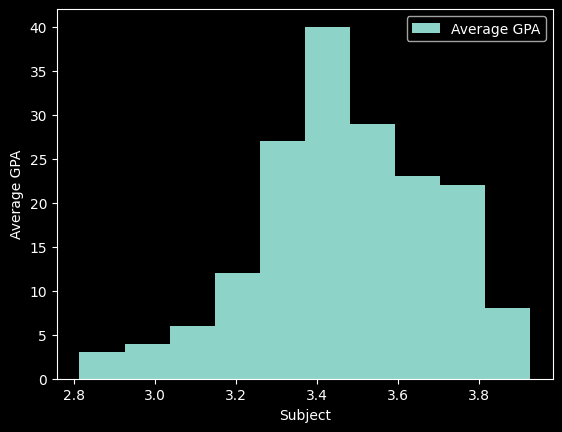

In [46]:
df_subject.plot.hist(x = "Subject", y = "Average GPA", xlabel = "Subject", ylabel= "Average GPA")

### Analysis: Histogram Interpretations

**Q4: Based on the histogram you generated above, what do you think the Average GPA across all courses in a typical Subject at UIUC is? No need for an exact answer, just estimate.** 


*(✏️ 

about a 3.45 average. Maybe a bit higher since the graph is skewed to the left.

 ✏️)*

### Puzzle 2.5: Your Major! 
We've done a lot of analysis on every course and every subject, but Data Science should also be personal to you!

Using your `df_subject`, isolate the row containing the `Subject` of **your Major**, storing in the variable `my_subject`:

(If you're undecided, you can pick any `Subject` you are interested in!)

In [45]:
econ = df_subject[df_subject["Subject"] == "ECON"]
econ

,Subject,Year,Term,YearTerm,Number,Course Title,Sched Type,A+,A,A-,...,C,C-,D+,D,D-,F,W,Primary Instructor,Students,Average GPA
57,ECON,7769515,WinterWinterWinterFallFallFallFallFallFallFall...,2024-wi2024-wi2024-wi2023-fa2023-fa2023-fa2023...,966233,Microeconomic PrinciplesMacroeconomic Principl...,ONLONLONLDISDISDISDISDISDISDISDISDISDISDISDISD...,22117,42231,21106,...,9521,4195,2668,3268,1561,4444,905,"DiIanni, IsaacVazquez, Jose JSchultz, ColleenC...",170864,3.192452


### Analysis: Your Major's Average GPA

**Q5: Observe the `Average GPA` column of your subject from Puzzle 2.5 above. Is it higher or lower than you expected? Explain why!** 


*(✏️ 

A bit lower than expected. Although it is a common major, econ degrees are frequently used to get into grad school, so I was expecting a higher gpa average. Although some of the classes are a difficult and demanding, my classmates are typically exchange students with interest in Law, Mathamatics, or Applied sciences.

 ✏️)*

<hr style="color: #DD3403;">

# Part 3: GPA By Year
At this point, we've investigated the GPA Dataset as a whole and grouped by `Subject`. While our GPA Dataset contains **a lot** of course data, some of the listed courses are quite old: **dating back to 2010**!

One can question the changes to GPA **over time**. Some questions may include:
- Has GPA gone up, because classes became "easier"? 
- Has the GPA fallen because of stricter grading policies? 
- How was GPA impacted in 2019-2020 at the brunt of COVID? 

You will gain some insight into the answers to questions in this section of the lab. 

### Puzzle 3.1: Exploring Different Years

In the following cell, create a new DataFrame called `df_year` that has a single row for each year. In ``df_year``, each **letter grade column** should contain the **total number of students** receiving said grade in that `Year`. Make sure your DataFrame only contains numeric columns.

In [ ]:
df_year = df.groupby("Year").agg("sum").reset_index()
df_year.head(3)

### 🔬 Test Case Checkpoint 🔬

In [ ]:
## == TEST CASE for Puzzle 3.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any errors, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
import math
assert( 'df_year' in vars() ), "Make sure your DataFrame grouped by Year is named 'df_year'." 
assert( len(df_year) == 15 ), "Make sure you are grouping by 'Year'. There are 14 years in our original `df`, so the length of `df_year` should be 14."
assert( math.isclose(df_year.Students.mean(), 274749.3333333333) ), "Double-check that you are aggregating your df_year correctly."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

### Puzzle 3.2: Fixing our `Average GPA` Column Again
Some columns in `df_year` are incorrectly calculated given the way we've grouped the data.

Let's fix this by redefining the `Average GPA` column in our `df_year`.

The `Average GPA` column should contain the **weighted average GPA** of each `Year` by taking into account the **number of students** who received each letter grade in said `Year`. 

In [42]:
df_year["Average GPA"] = (4*df_year["A+"]) + (4*df_year["A"]) + (3.67 *df_year["A-"]) + (3.33*df_year["B+"]) + (3*df_year["B"]) + (2.67 *df_year["B-"]) +(2.33*df_year["C+"]) + (2*df_year["C"]) + (1.67 *df_year["C-"]) + (1.33*df_year["D+"]) + (1*df_year["D"]) + (0.67 *df_year["D-"]) + (0 *df_year["F"])
df_year["Average GPA"] = df_year["Average GPA"] / df_year["Students"]
df_year.columns

df_year[[
    "Year",
    "Average GPA",
    "A+",
    "A",
    "A-",
    "B+",
    "B",
    "B-",
    "C+",
    "C",
    "C-",
    "D+",
    "D",
    "D-",
    "F"
    ]
]


,Year,Average GPA,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F
0,2010,3.233537,19355,77012,36814,30579,43517,17195,11604,15753,5812,2975,4438,1506,4511
1,2011,3.224523,19569,75526,36462,30987,42453,16776,11351,15844,6243,2910,4513,1679,4751
2,2012,3.253189,11834,44738,20603,17041,22408,9485,6515,8221,3307,1690,2218,936,2681
3,2013,3.250664,22541,81114,37513,30624,40241,17471,11611,14875,6367,3103,4263,1851,4895
4,2014,3.239539,25081,79289,36792,30749,38679,17724,11713,14802,6579,3252,4640,2073,5363
5,2015,3.266565,29032,87101,39378,31895,40221,18172,12281,14891,6576,3550,4528,2050,5572
6,2016,3.275508,29094,85548,37962,30278,37678,16759,11590,14199,6114,3333,4271,1964,5785
7,2017,3.301601,34941,92166,38295,29889,37541,16494,11117,14270,6130,3254,4600,2014,6151
8,2018,3.337883,40112,98711,39621,29546,35837,16123,10809,13421,5949,3339,4350,2042,6253
9,2019,3.339275,41642,104139,40875,30890,37332,16680,11203,13623,6117,3283,4434,2212,6914


### 🔬 Test Case Checkpoint 🔬

In [33]:
## == TEST CASE for Puzzle 3.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any errors, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
import math
assert( len(df_year) == 15 ), "You shouldn't be changing the length of `df_year` when recomputing Average GPA."
assert( "Average GPA" in df_year.columns), "Make sure your column is still named 'Average GPA'."
assert( math.isclose(df_year['Average GPA'].mean(), 3.3497684856756313) ), "Your calculation of the Average GPA by Year is incorrect."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 3.3: Visualizing GPA over Time
We now have the data of the `Average GPA` across the University over time in years. Using this data, we can generate yet another visualization built-in to Pandas to visualize this data: a **line plot**! 

In the cell below, plot the **average GPA over time** using `df_year`. Make sure the x and y axis are labeled appropriately!

<Axes: xlabel='Year'>

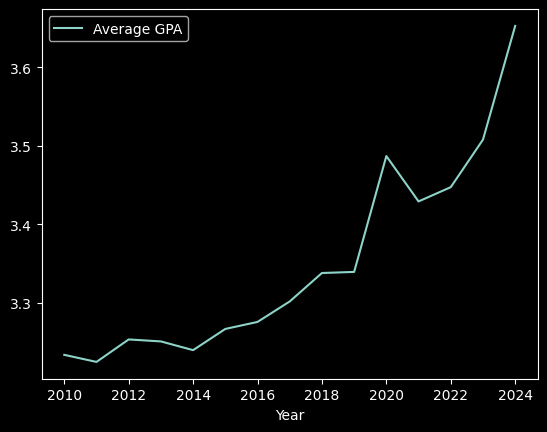

In [44]:
df_year.plot.line(x ="Year", y = "Average GPA" )


***Side Note***: If you're using **Visual Studio Code** on **dark mode**, you may not be able to see the **axes** and **axes labels** of the graph. 

**Only if** this is the case, please **copy and run** the following **two lines** of code in a cell:

---
```py
from matplotlib import style
style.use('dark_background')
```
---

And then **re-run your plotting code** above. 

### Analysis: Plotted GPA over Time

**Q6: Note a few observations you have about the changes to `Average GPA` at Illinois over time. Is there an overall trend? What events could have spiked increases to the Average GPA? Explain your answer in detail!** 


*(✏️ 

The average gpa has been increasing over the past few years. The spike occured in around 2020, this could be due to COVID-19 and students shifting to a remote setting. The increase in GPA could be of increased cheating, use of AI, and isolation from distractions becasue of quarentine. 

 ✏️)*

<hr style="color: #DD3403;">

# Submission

You're almost done!  All you need to do is to commit your lab to GitHub:

1.  ⚠️ **Make certain to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook and follow the Canvas instructions to commit this lab to your Git repository!

3. Your TA will grade your submission and provide you feedback after the lab is due. :)